In [1]:
import pandas as pd
import nltk
from nltk import tokenize

In [2]:
# thực hiện tiếp các nhiệm vụ sau:
# 
#  lựa chọn đặc trưng 1-gram, 2-gram
# convert sang vector với trọng số ở các mode: binary, count, tfidf 
# chia thành tập Train và Test 
# xây dựng các mô hình học: NB, SVM, Neural Network 
# chọn mô hình tốt nhất và viết hàm dự đoán sentiment của một câu đưa vào

In [3]:
filename = 'sentimentVN.csv'
df = pd.read_csv(filename)
print(df.head(5))
print(df.shape)

   Unnamed: 0                                       comment label
0           0                         áo bao đẹp ạ positive   POS
1           1                            tuyệt vời positive   POS
2           2                     2day ao không giong trong   NEG
3           3  mùi thơm bôi lên da mềm da nagative positive   POS
4           4                      vải đẹp dày dặn positive   POS
(31460, 3)


In [4]:
from collections import Counter 
counter = Counter()
labels = df['label']
reviews = df.values[:,1] 
counter.update(labels)
print(counter)
print(reviews[:5])

Counter({'POS': 20093, 'NEG': 6669, 'NEU': 4698})
['áo bao đẹp ạ positive' 'tuyệt vời positive' '2day ao không giong trong'
 'mùi thơm bôi lên da mềm da nagative positive' 'vải đẹp dày dặn positive']


<BarContainer object of 3 artists>

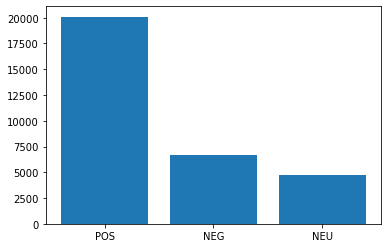

In [5]:
import matplotlib.pyplot as plt
plt.bar(counter.keys(),counter.values())

In [6]:
from nltk import word_tokenize
from gensim.corpora.dictionary import Dictionary
import numpy as np


In [7]:
filename = 'sentimentVN.csv'
df = pd.read_csv(filename, encoding='utf-8')
# print(df.head(5))
# print(df.shape)


In [8]:
data = df.values
print(data.shape)

(31460, 3)


In [9]:
print(data[:2])

[[0 'áo bao đẹp ạ positive' 'POS']
 [1 'tuyệt vời positive' 'POS']]


In [10]:
lines = data[:,1]
labels= data[:,2]
print(lines[:5])
print(labels[:5])

['áo bao đẹp ạ positive' 'tuyệt vời positive' '2day ao không giong trong'
 'mùi thơm bôi lên da mềm da nagative positive' 'vải đẹp dày dặn positive']
['POS' 'POS' 'NEG' 'POS' 'POS']


In [11]:
import nltk
from keras.preprocessing.text import Tokenizer
sentences = [nltk.word_tokenize(str(sent)) for sent in lines]
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(sentences)
#tach tu
#sentences = [nltk.word_tokenize(data)]
#print(sentences[0])
print(sentences[0])

['áo', 'bao', 'đẹp', 'ạ', 'positive']


In [12]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)


In [13]:
X = tokenizer.texts_to_matrix(sentences, mode='count')
print(X)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]]


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(X, labels, test_size=0.2,random_state=0)


In [15]:
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
model_LR = LogisticRegression()
model_LR = model_LR.fit(X_train, Y_train)
y_pred = model_LR.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

In [ ]:
input_sent= 'hàng rất đẹp rất chi là ưng ý positive positive'
input_sentences = [nltk.word_tokenize(input_sent)]
print(input_sentences)


In [ ]:
X_input = tokenizer.texts_to_matrix(input_sentences, mode='binary')
print(X_input)



In [ ]:
y_pred = model_LR.predict(X_input)
print(y_pred)